# Assignement - Empirical Methods on Finance - Guillaume IDAME KORALAGE

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Libraries

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
from scipy.stats import norm

## 1. Maximum Time Under Water

### Load Funds Data

In [49]:
#Import dataset through CSV file
raw_data = pd.read_csv("funds.csv", delimiter=",", skiprows=0, index_col=0, parse_dates=[0], dayfirst=True)

In [50]:
raw_data.index = pd.to_datetime(raw_data.index)

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

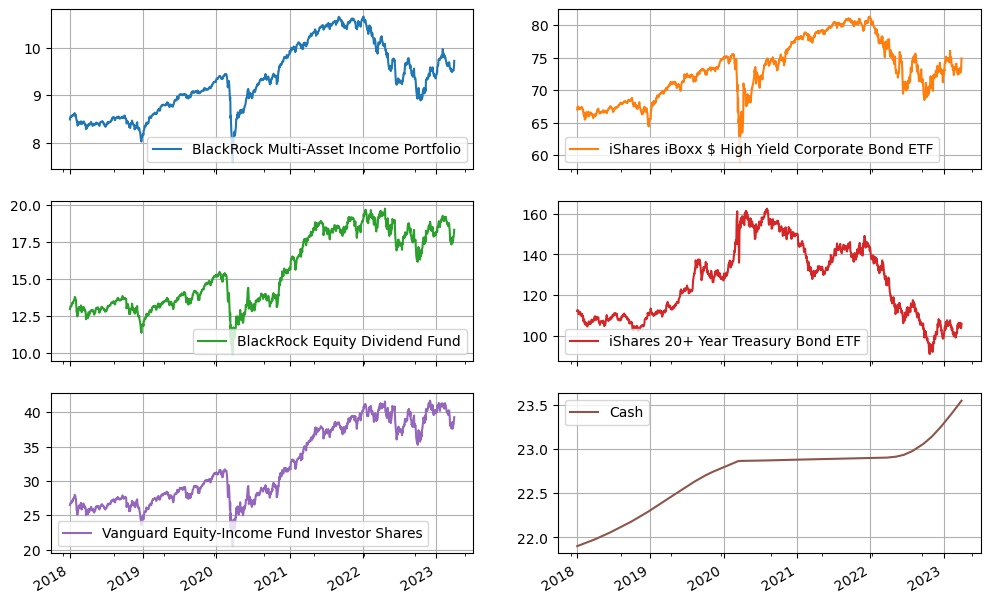

In [51]:
#Overview of the dataset
raw_data.plot(subplots = True, layout = (3,2), figsize = (12,8), grid = True)

#### 1. Write a Python function that calculates the first hitting index for a Pandas Series. This function should take a Pandas Series and a number and return the first index where the Series is greater than or equal to the number. If the target is never hit, the function should return some default value, e.g. an empty object.

In [6]:
def first_hitting_index(series, number):
    
    boolean_vector = (series > series[number]).astype(int)
    boolean_vector_from_number_selected = boolean_vector[boolean_vector.index > series.index[number]]

    if len(boolean_vector_from_number_selected) != 0:
        target_index = boolean_vector_from_number_selected[boolean_vector_from_number_selected == 1].index[0]

    else:
        target_index = "None"
    
    return(target_index)

#### Configuration Settings

In [7]:
column = "BlackRock Multi-Asset Income Portfolio"
series = raw_data[column]
number = 1300

#### Output

In [8]:
target_index = first_hitting_index(series, number)
target_index

Timestamp('2023-03-06 00:00:00')

#### 2. Write a Python function that returns the longest “period under water” for a Pandas Series and the duration in days of that period. A possible approach is to calculate all HWMs in the Series, as defined previously, and to find the first “recovery date” after each HWM. The start date of the “period under water” is the date when the HWM is first reached, and the end date is the date when it is reached for the second time. The function should return the start and the end dates of the longest period under water and the duration in calendar days.

In [9]:
def longest_period_under_water(series):
    
    series = series.resample("D").last().ffill()
    
    high_water_marks = []
    for i in range(1, len(series) - 1):
        if series[i] >= max(series[:i]) and series[i] > series[i + 1]:
            high_water_marks.append(i)

    max_period = 0
    start_date = None
    end_date = None

    for i in range(len(high_water_marks)):
        current_start = high_water_marks[i]
        if i < len(high_water_marks) - 1:
            current_end = high_water_marks[i + 1]
        else:
            current_end = len(series) - 1
        period_length = current_end - current_start
        if period_length > max_period:
            max_period = period_length
            start_date = series.index[current_start]
            end_date = series.index[current_end]

    return start_date, end_date, max_period

#### Configuration Settings

In [10]:
column = "BlackRock Multi-Asset Income Portfolio"
series = raw_data[column]

#### Output

In [11]:
longest_period_under_water_value = longest_period_under_water(series)
longest_period_under_water_value

(Timestamp('2022-01-04 00:00:00'), Timestamp('2023-03-31 00:00:00'), 451)

#### 3. Find the longest periods under water for the 6 funds

In [12]:
list_funds = list(raw_data.columns)

dict_longest_period_under_water = {}
dict_start_date = {}
dict_end_date = {}
for fund in list_funds :
    series = raw_data[fund]
    dict_start_date[fund], dict_end_date[fund], dict_longest_period_under_water[fund] = longest_period_under_water(series)

In [13]:
#DataFrame Output
longest_hmw_days_funds = pd.DataFrame.from_dict(dict_longest_period_under_water, orient='index', columns=['longest HMW days'])
start_date_funds = pd.DataFrame.from_dict(dict_start_date, orient='index', columns=['start date'])
end_date_funds = pd.DataFrame.from_dict(dict_end_date, orient='index', columns=['end date'])

output_hmw_data = pd.concat([longest_hmw_days_funds, start_date_funds, end_date_funds], axis = 1)
output_hmw_data

,longest HMW days,start date,end date
BlackRock Multi-Asset Income Portfolio,451,2022-01-04,2023-03-31
iShares iBoxx $ High Yield Corporate Bond ETF,459,2021-12-27,2023-03-31
BlackRock Equity Dividend Fund,345,2022-04-20,2023-03-31
iShares 20+ Year Treasury Bond ETF,969,2020-08-04,2023-03-31
Vanguard Equity-Income Fund Investor Shares,435,2018-01-28,2019-04-08
Cash,0,NaT,NaT


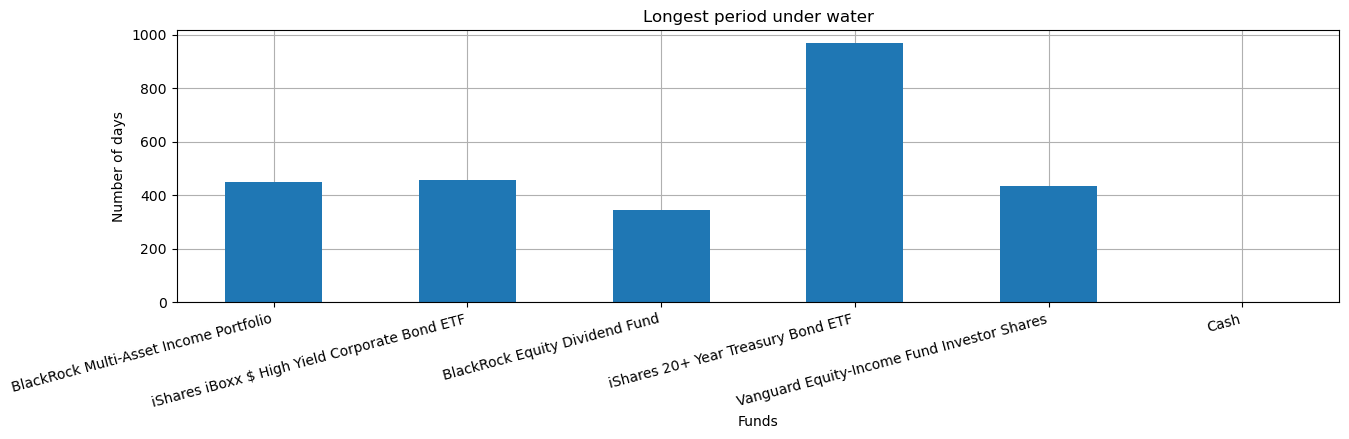

In [14]:
#Bar Plot
fig, ax = plt.subplots(figsize=(15,4))
output_hmw_data["longest HMW days"].plot(kind='bar', ax = ax)
ax.set_title("Longest period under water")
ax.set_xlabel("Funds")
ax.set_ylabel("Number of days")
ax.grid()
ax.set_axisbelow(True)
fig.autofmt_xdate(rotation=15)

#### Sanity Check

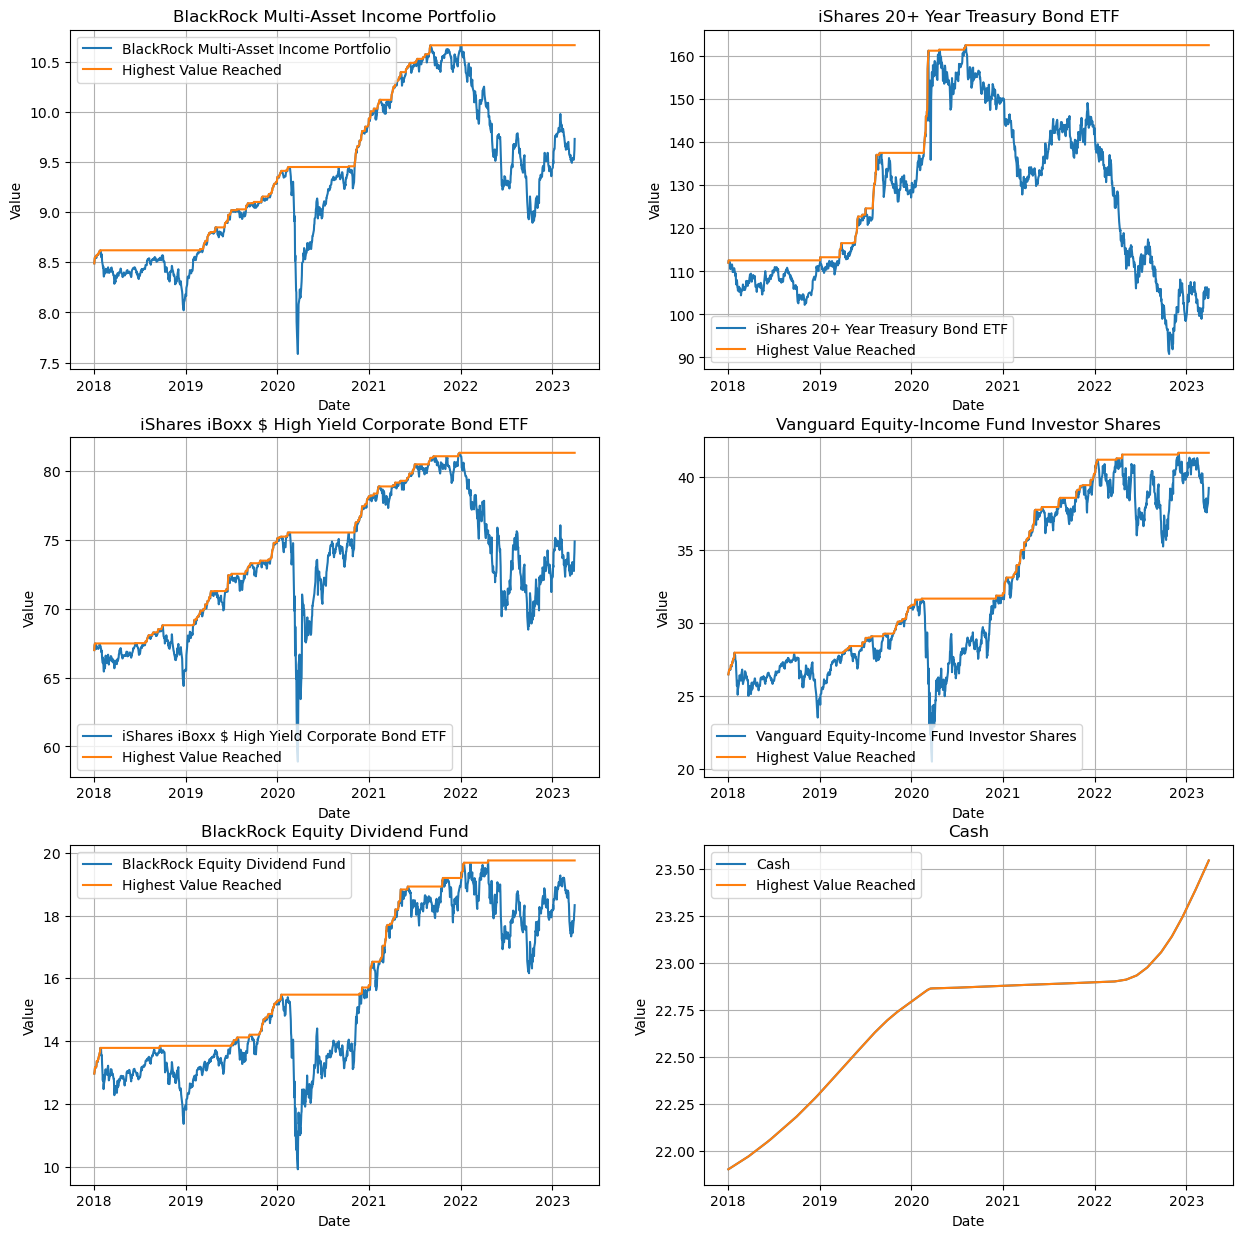

In [15]:
# Subplots 3 raws and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(15, 15)) 

# 1st Column
# For loop to print each funds and its max values reached 
for i in range(3):
    axs[i,0].plot(raw_data.iloc[:,i], label = raw_data.iloc[:,i].name)
    axs[i,0].plot(raw_data.iloc[:,i].cummax(), label = "Highest Value Reached")
    axs[i,0].set_xlabel('Date')
    axs[i,0].set_ylabel('Value')
    axs[i,0].set_title(raw_data.iloc[:,i].name)
    axs[i,0].grid()
    axs[i,0].legend()
    
# 2nd Column
# For loop to print each funds and its max values reached 
for j in range(3):
    axs[j,1].plot(raw_data.iloc[:,j+3], label = raw_data.iloc[:,j+3].name)
    axs[j,1].plot(raw_data.iloc[:,j+3].cummax(), label = "Highest Value Reached")
    axs[j,1].set_xlabel('Date')
    axs[j,1].set_ylabel('Value')
    axs[j,1].set_title(raw_data.iloc[:,j+3].name)
    axs[j,1].grid()
    axs[j,1].legend()


# 2. Factor-Based Covariance Matrix Estimation

#### 1. Import the weekly factor values (market, size and value) and the daily portfolio returns.

In [67]:
#Define path to load portfolio data
path_portfolio = "100_Portfolios_10x10_Daily_OnlyVW.csv"

# Read CSV with boundaries raws to load specific data (Average Value Weighted Returns -- Daily)
daily_portfolio_data = pd.read_csv(path_portfolio, delimiter=",", skiprows=18, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)

# Delete Na Values and transform string data into float
daily_portfolio_data = daily_portfolio_data.dropna().apply(pd.to_numeric, errors = 'coerce')

# Delete index date from format string to format DateTimeIndex
daily_portfolio_data.index = pd.to_datetime(daily_portfolio_data.index, format='%Y%m%d')
daily_portfolio_data

C:\Users\idame\AppData\Local\Temp\ipykernel_26072\2569613780.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_portfolio_data = pd.read_csv(path_portfolio, delimiter=",", skiprows=18, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)
C:\Users\idame\AppData\Local\Temp\ipykernel_26072\2569613780.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_portfolio_data = pd.read_csv(path_portfolio, delimiter=",", skiprows=18, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
1926-07-01,-99.99,0.00,-99.99,1.59,-3.08,4.64,2.57,3.81,-0.52,-0.84,...,0.03,1.10,-0.15,-0.03,0.52,0.48,-0.43,-0.08,0.17,-99.99
1926-07-02,-99.99,-0.27,-99.99,0.00,-0.97,-4.10,0.31,-0.47,2.74,-0.27,...,0.31,0.71,0.97,0.57,0.52,0.15,0.63,-0.04,0.34,-99.99
1926-07-06,-99.99,1.01,-99.99,-4.69,2.35,-1.79,0.00,2.44,-5.18,-0.23,...,0.49,-0.19,0.89,0.31,-0.12,-0.18,-0.33,-0.40,-0.34,-99.99
1926-07-07,-99.99,-1.67,-99.99,4.92,0.51,5.27,0.00,-0.74,-0.24,-0.02,...,-0.20,-0.01,0.66,0.38,0.03,0.25,-0.29,0.52,0.17,-99.99
1926-07-08,-99.99,0.00,-99.99,1.56,-0.51,-1.06,0.00,4.90,0.45,0.26,...,0.56,-0.12,0.35,0.55,-0.14,0.19,-0.12,0.54,0.51,-99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-1.40,-1.65,-0.37,-0.31,-1.31,-0.56,-1.57,0.26,-0.08,-1.39,...,0.64,0.19,0.41,0.13,0.83,-0.71,-0.73,-1.00,-0.92,-2.11
2023-07-26,1.03,0.63,1.89,0.86,0.43,0.80,1.20,1.25,1.69,1.65,...,-0.81,-0.21,3.08,0.03,0.03,-0.42,0.58,0.61,1.13,0.59
2023-07-27,-1.93,-0.84,-1.82,-1.45,-2.58,-2.65,-1.71,-1.85,-0.69,-1.28,...,-0.97,-0.48,-0.40,-1.89,1.05,0.17,-0.59,-2.55,-0.27,0.90
2023-07-28,2.16,1.23,2.52,2.81,3.43,2.32,1.81,1.87,1.92,2.17,...,1.53,1.25,1.65,0.05,1.09,0.97,0.39,-0.41,0.97,-0.98


In [68]:
#Define path to load portfolio data
path_factors = "F-F_Research_Data_Factors_weekly.csv"

# Read CSV
weekly_factors_data = pd.read_csv(path_factors, delimiter=",", skiprows=4, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)

# Delete Na Values and transform string data into float
weekly_factors_data = weekly_factors_data.dropna().apply(pd.to_numeric, errors = 'coerce')

# Delete index date from format string to format DateTimeIndex
weekly_factors_data.index = pd.to_datetime(weekly_factors_data.index, format='%Y%m%d')

# Select the 3 first column (Mkt RF, SMB, HML)
weekly_factors_data = weekly_factors_data.iloc[:,:3]

C:\Users\idame\AppData\Local\Temp\ipykernel_26072\2929917278.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekly_factors_data = pd.read_csv(path_factors, delimiter=",", skiprows=4, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)
C:\Users\idame\AppData\Local\Temp\ipykernel_26072\2929917278.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekly_factors_data = pd.read_csv(path_factors, delimiter=",", skiprows=4, index_col=0, parse_dates=[0], dayfirst=True, low_memory=False)


#### 2. Eliminate from the investment universe the portfolio that have at least one missing return (represented as -99.99 in the data) between January 2, 1970 and July 28, 2023. How many portfolios does the universe contain? The analysis in what follows is restricted to the period from January 9, 1970 to July 28, 2023.

In [69]:
# transform data -99.99 to NaN values
daily_portfolio_data_clean = daily_portfolio_data.replace(-99.99, np.nan)

# select specific start date and end date and drop any column with any NaN values 
daily_portfolio_data_filtered = daily_portfolio_data_clean.loc["1970-01-02":"2023-07-28"].dropna(axis=1)
daily_portfolio_data_filtered

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-02,5.34,3.66,4.81,3.37,3.70,4.44,5.11,2.35,3.04,3.15,...,2.41,2.31,3.89,-0.07,1.33,-0.09,0.92,2.12,1.02,0.78
1970-01-05,2.17,2.10,3.24,1.92,2.42,1.49,2.63,2.54,2.55,2.07,...,1.12,1.42,1.60,0.37,-0.03,-0.15,1.06,-0.18,1.03,0.81
1970-01-06,-0.93,-0.96,-0.42,-0.78,-0.28,0.17,-0.13,-0.28,-0.46,0.06,...,-0.99,-1.10,-0.85,-0.39,-0.59,-1.00,-0.89,-0.64,-1.47,-0.78
1970-01-07,1.24,0.53,1.37,0.70,0.67,0.22,1.20,0.34,0.34,0.74,...,0.01,-0.32,-0.29,0.11,-0.18,0.07,-0.83,-0.34,-0.41,-0.48
1970-01-08,0.94,0.91,0.03,1.01,0.21,0.44,0.73,0.20,0.13,0.65,...,-0.15,0.07,-0.17,0.38,0.11,0.02,-0.67,-0.14,-0.28,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,-2.30,-0.74,-0.90,-2.32,-1.23,-1.70,0.42,0.42,1.30,-0.43,...,1.06,1.02,-2.47,0.49,-0.11,0.69,1.10,0.26,0.45,1.09
2023-07-25,-1.40,-1.65,-0.37,-0.31,-1.31,-0.56,-1.57,0.26,-0.08,-1.39,...,-0.08,-1.06,-0.63,0.64,0.19,0.41,0.13,0.83,-0.71,-0.73
2023-07-26,1.03,0.63,1.89,0.86,0.43,0.80,1.20,1.25,1.69,1.65,...,0.35,1.14,1.84,-0.81,-0.21,3.08,0.03,0.03,-0.42,0.58
2023-07-27,-1.93,-0.84,-1.82,-1.45,-2.58,-2.65,-1.71,-1.85,-0.69,-1.28,...,-0.68,-1.71,-3.68,-0.97,-0.48,-0.40,-1.89,1.05,0.17,-0.59


In [70]:
# Take the number of columns corresponding to the number of portfolio remaining
number_portfolio = len(daily_portfolio_data_filtered.columns)
print("Number of portfolios :", number_portfolio)

Number of portfolios : 96


#### 3. Calculate the daily portfolio values assuming an initial value of USD 1 on January 2, 1970.

Starting with USD 1 on January 2, 1970

In [71]:
# We assume that on January 2, 1970, USD 1
# We do a compounding with the daily returns and we do not display the value of USD 1 on January 2, 1970, USD 1
dollar_portfolio_data_filtered = (1+(daily_portfolio_data_filtered.loc["1970-01-05":]/100)).cumprod()
dollar_portfolio_data_filtered

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-05,1.021700,1.021000,1.032400,1.019200,1.024200,1.014900,1.026300,1.025400,1.025500,1.020700,...,1.011200,1.014200,1.016000,1.003700,0.999700,0.998500,1.010600,0.998200,1.010300,1.008100
1970-01-06,1.012198,1.011198,1.028064,1.011250,1.021332,1.016625,1.024966,1.022529,1.020783,1.021312,...,1.001189,1.003044,1.007364,0.999786,0.993802,0.988515,1.001606,0.991812,0.995449,1.000237
1970-01-07,1.024749,1.016558,1.042148,1.018329,1.028175,1.018862,1.037265,1.026005,1.024253,1.028870,...,1.001289,0.999834,1.004443,1.000885,0.992013,0.989207,0.993292,0.988439,0.991367,0.995436
1970-01-08,1.034382,1.025808,1.042461,1.028614,1.030334,1.023345,1.044837,1.028057,1.025585,1.035558,...,0.999787,1.000534,1.002735,1.004689,0.993104,0.989405,0.986637,0.987056,0.988591,0.995535
1970-01-09,1.031796,1.027655,1.035685,1.025220,1.029304,1.020787,1.037837,1.029805,1.024149,1.035661,...,0.997588,0.997032,0.998624,1.005292,0.992707,0.983864,0.981408,0.982515,0.968918,0.994938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,0.232477,16.356001,71.719161,90.088474,202.921336,326.973802,780.124256,764.855831,2395.537972,2082.103100,...,147.604398,710.903553,101.665133,162.806407,398.316148,274.111184,316.111204,150.592714,441.321435,32.105489
2023-07-25,0.229223,16.086127,71.453800,89.809199,200.263067,325.142749,767.876305,766.844456,2393.621542,2053.161867,...,147.486315,703.367976,101.024642,163.848368,399.072948,275.235039,316.522149,151.842633,438.188053,31.871119
2023-07-26,0.231584,16.187469,72.804276,90.581558,201.124198,327.743891,777.090821,776.430012,2434.073746,2087.039038,...,148.002517,711.386371,102.883496,162.521197,398.234895,283.712279,316.617105,151.888186,436.347663,32.055972
2023-07-27,0.227114,16.051495,71.479239,89.268126,195.935194,319.058678,763.802568,762.066057,2417.278637,2060.324938,...,146.996100,699.221664,99.097383,160.944741,396.323368,282.577430,310.633042,153.483012,437.089454,31.866842


#### 4. From the daily portfolio values, calculate the weekly portfolio returns over the same weeks as in the factor dataset.

In [72]:
# we resample Weekly on Friday the daily portfolio values 
# we take the last 
# we compute the percentage change of each rows 
# we drop Nan values
weekly_portfolio_data_filtered = dollar_portfolio_data_filtered.resample("W-FRI").last().pct_change().dropna()
weekly_portfolio_data_filtered

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-16,-0.015258,-0.029384,-0.029480,-0.033742,-0.017554,-0.016339,-0.042613,-0.020226,-0.014835,-0.010470,...,-0.026729,-0.030440,-0.022244,-0.002597,-0.016025,-0.003335,-0.013893,-0.026941,-0.032872,-0.021724
1970-01-23,-0.012650,-0.010300,-0.014084,-0.002581,-0.026777,-0.012035,-0.014454,-0.005561,-0.012658,-0.006017,...,-0.005011,0.006010,0.000551,-0.037102,-0.009586,-0.021845,-0.024583,-0.008343,-0.018739,-0.026157
1970-01-30,-0.046885,-0.060140,-0.057800,-0.038608,-0.049756,-0.051404,-0.046433,-0.046143,-0.036619,-0.025736,...,-0.045612,-0.061167,-0.031281,-0.056894,-0.052965,-0.028781,-0.058693,-0.039594,-0.062653,-0.054100
1970-02-06,0.014705,0.002599,0.025109,-0.003000,0.014201,0.014046,0.010934,-0.004489,0.013662,-0.000729,...,0.004572,0.019227,0.016489,0.030736,0.019955,0.014943,0.022380,0.030639,0.001279,0.014945
1970-02-13,-0.002850,0.001496,-0.007353,0.015645,0.018282,-0.005894,-0.004308,0.009336,0.005365,0.003858,...,-0.004181,0.019817,0.001689,0.009646,0.002473,0.007633,-0.022846,0.014995,-0.014391,-0.030017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,0.023503,0.030219,0.002679,-0.027547,0.016772,0.009079,-0.038995,0.010365,0.010319,0.027163,...,0.026846,0.041122,0.031612,0.023893,0.007750,0.010541,-0.014422,0.021658,0.032119,0.032066
2023-07-07,0.009955,-0.020315,-0.002356,-0.004905,-0.006783,-0.019104,-0.000625,0.011427,0.006328,0.011024,...,0.010740,0.009464,-0.000014,-0.011271,-0.019290,-0.012171,-0.015348,-0.010497,-0.002561,-0.000171
2023-07-14,0.007599,0.012281,0.006901,0.003890,0.034300,0.026466,-0.001363,0.020926,0.021392,0.028531,...,0.005379,0.027694,-0.011163,0.025084,0.024520,0.037288,0.037868,0.029107,0.007548,0.014281
2023-07-21,0.017220,-0.002109,0.009454,0.013855,0.027115,0.011197,0.034404,0.048066,0.029126,0.032652,...,0.029249,0.010451,0.042726,-0.001450,0.015858,-0.008638,0.031841,-0.000478,0.010771,0.029402


#### 5. Write a function that takes a DataFrame of asset returns (𝑇 rows and 𝑁 columns) and a DataFrame of factor values (𝑇 rows and 𝐾 columns) and returns the factor-based covariance matrix estimate.

In [73]:
def factor_covariance_matrix(asset_returns, factor_values):
    """
    Compute the factor-based covariance matrix estimate.

    Parameters:
    asset_returns (pandas.DataFrame): DataFrame of asset returns with T rows and N columns.
    factor_values (pandas.DataFrame): DataFrame of factor values with T rows and K columns.

    Returns:
    numpy.ndarray: Factor-based covariance matrix estimate.
    """
    # Number of assets
    N = len(asset_returns.columns)
    K = len(factor_values.columns)
    T = len(factor_values)

    # Betas and residuals for each asset
    betas = {}
    residuals = {}
    for column in range(N):
        X = factor_values.copy().values
        X = sm.add_constant(X) # Adding a constant (intercept)
        y = asset_returns.iloc[:, column].values 
        ols_model = sm.OLS(y, X).fit()
        betas[column] = ols_model.params[:-1]
        residuals[column] = ols_model.resid

    betas_data = pd.DataFrame.from_dict(betas, orient='index', columns = factor_values.columns)
    residuals_data = pd.DataFrame.from_dict(residuals, orient='columns')
    sigma_matrix_f = betas_data.cov()
    sigma_matrix_e = pd.DataFrame(np.diag((residuals_data**2).sum()/(T-K-1)))
    factor_based_covariance = betas_data.values @ sigma_matrix_f.values @ betas_data.T.values + sigma_matrix_e.values
    factor_based_covariance_data = pd.DataFrame(factor_based_covariance)

    return factor_based_covariance_data

In [74]:
# Make sure that there is no missing data for weekly data factors and if so, we fill forward the missing data
weekly_factors_data_resample = weekly_factors_data.resample("W-FRI").last().ffill()

# We select the same range of date of weekly portfolio data
weekly_factors_data_filtered = weekly_factors_data_resample[weekly_portfolio_data_filtered.index.min() : weekly_portfolio_data_filtered.index.max()]

# Compute de Factor Covariance Matrix
factor_covariance_matrix(weekly_portfolio_data_filtered.loc["1970-01-16":"2023-01-01"], weekly_factors_data_filtered.loc["1970-01-16":"2023-01-01"])

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,2.943489e-04,3.418657e-09,3.512801e-09,3.126660e-09,2.921492e-09,2.730876e-09,2.803072e-09,2.479394e-09,2.473329e-09,2.611229e-09,...,-5.786812e-11,1.142545e-10,3.088126e-10,-7.286869e-10,-6.465915e-10,-5.990861e-10,-5.927457e-10,-6.968716e-10,-6.586256e-10,-7.086996e-10
1,3.418657e-09,3.398731e-04,3.223437e-09,2.869128e-09,2.680900e-09,2.506041e-09,2.572347e-09,2.275314e-09,2.269861e-09,2.396333e-09,...,-5.310502e-11,1.049424e-10,2.832376e-10,-6.684680e-10,-5.930869e-10,-5.495449e-10,-5.437428e-10,-6.393615e-10,-6.042320e-10,-6.504095e-10
2,3.512801e-09,3.223437e-09,2.645783e-04,2.948227e-09,2.754785e-09,2.575103e-09,2.643340e-09,2.337994e-09,2.332487e-09,2.462354e-09,...,-5.605931e-11,1.063002e-10,2.891667e-10,-6.886019e-10,-6.110482e-10,-5.662903e-10,-5.604097e-10,-6.586890e-10,-6.225951e-10,-6.702013e-10
3,3.126660e-09,2.869128e-09,2.948227e-09,1.913600e-04,2.452153e-09,2.292263e-09,2.352806e-09,2.081286e-09,2.076247e-09,2.192004e-09,...,-4.645808e-11,9.823922e-11,2.616311e-10,-6.088465e-10,-5.399979e-10,-5.002315e-10,-4.948206e-10,-5.822944e-10,-5.501327e-10,-5.923155e-10
4,2.921492e-09,2.680900e-09,2.754785e-09,2.452153e-09,2.040593e-04,2.142038e-09,2.198478e-09,1.944952e-09,1.940157e-09,2.048428e-09,...,-4.102304e-11,9.431681e-11,2.474069e-10,-5.660679e-10,-5.018579e-10,-4.647537e-10,-4.595763e-10,-5.413146e-10,-5.112360e-10,-5.505355e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-5.990861e-10,-5.495449e-10,-5.662903e-10,-5.002315e-10,-4.647537e-10,-4.328620e-10,-4.506953e-10,-3.903279e-10,-3.938684e-10,-4.107823e-10,...,1.172442e-10,9.513691e-11,8.392665e-11,2.444239e-10,2.254591e-10,9.814984e-05,2.202168e-10,2.371866e-10,2.320744e-10,2.465463e-10
92,-5.927457e-10,-5.437428e-10,-5.604097e-10,-4.948206e-10,-4.595763e-10,-4.279527e-10,-4.459584e-10,-3.857488e-10,-3.895177e-10,-4.059479e-10,...,1.221943e-10,1.006326e-10,9.070506e-11,2.491293e-10,2.300311e-10,2.202168e-10,1.376636e-04,2.418520e-10,2.368511e-10,2.515524e-10
93,-6.968716e-10,-6.393615e-10,-6.586890e-10,-5.822944e-10,-5.413146e-10,-5.043692e-10,-5.244222e-10,-4.551347e-10,-4.587718e-10,-4.790315e-10,...,1.240466e-10,9.765592e-11,8.238700e-11,2.697415e-10,2.483221e-10,2.371866e-10,2.418520e-10,1.581637e-04,2.555142e-10,2.716867e-10
94,-6.586256e-10,-6.042320e-10,-6.225951e-10,-5.501327e-10,-5.112360e-10,-4.762329e-10,-4.955909e-10,-4.295610e-10,-4.332864e-10,-4.520914e-10,...,1.243776e-10,9.981549e-11,8.669208e-11,2.633654e-10,2.427458e-10,2.320744e-10,2.368511e-10,2.555142e-10,1.798783e-04,2.655302e-10


#### 6. Calculate the GMV portfolio with the following two covariance matrix estimates: the sample covariance matrix estimated from January 1, 2021 to January 1, 2023, and the factor-based matrix estimated over the same period. Which portfolio has the bigger range of weights?

In [75]:
def weight_gmv(portfolio_data, factors_data, start_date, end_date) : 

    """
    Compute the weight of global minimum variance.

    Parameters:
    portfolio_data (pandas.DataFrame): DataFrame of asset returns with T rows and N columns.
    factors_data (pandas.DataFrame): DataFrame of factor values with T rows and K columns.
    start_date (string format YYYY-MM-DD)
    end_date (string format YYYY-MM-DD)
    
    Returns:
    w_gmv_sample (numpy.ndarray):  weight of global minimum variance for the sample covariance matrix.
    w_gmv_factor (numpy.ndarray): weight of global minimum variance for the factor based covariance matrix.
    """
    
    sample_cov_matrix = portfolio_data.loc[start_date : end_date].cov()
    factor_cov_matrix = factor_covariance_matrix(portfolio_data.loc[start_date : end_date], factors_data.loc[start_date : end_date])

    # Calculate the inverse of the covariance matrices
    sample_inv_cov_matrix = np.linalg.inv(sample_cov_matrix)
    factor_inv_cov_matrix = np.linalg.inv(factor_cov_matrix)

    # Define the column vector of ones
    ones = np.ones((sample_cov_matrix.shape[0], 1))

    # Calculate the GMV weights for the two covariance matrices
    w_gmv_sample = sample_inv_cov_matrix @ ones / (ones.T @ sample_inv_cov_matrix @ ones)
    w_gmv_factor = factor_inv_cov_matrix @ ones / (ones.T @ factor_inv_cov_matrix @ ones)
    
    return w_gmv_sample, w_gmv_factor

In [76]:
#Compute weights
w_gmv_sample, w_gmv_factor = weight_gmv(weekly_portfolio_data_filtered, weekly_factors_data_filtered, "2021-01-01", "2023-01-01") 

# Calculate the range of weights
range_weights_sample = np.max(w_gmv_sample) - np.min(w_gmv_sample)
range_weights_factor = np.max(w_gmv_factor) - np.min(w_gmv_factor)

print(f"Sample Range Weights : {range_weights_sample:.4f}")
print(f"Factor Range Weights : {range_weights_factor:.4f}")

# Compare the range of weights
if range_weights_sample > range_weights_factor:
    print("The GMV portfolio based on the sample covariance matrix has a bigger range of weights.")
elif range_weights_factor > range_weights_sample:
    print("The GMV portfolio based on the factor-based covariance matrix has a bigger range of weights.")
else:
    print("Both GMV portfolios have the same range of weights.")

Sample Range Weights : 3.2652
Factor Range Weights : 0.0345
The GMV portfolio based on the sample covariance matrix has a bigger range of weights.


#### 7. Compare the leverage amounts of the two portfolios.

In [77]:
leverage_simple = (abs(w_gmv_sample).sum()-1)*0.5
print(f"Leverage - Factor Aggregate Portfolio : {leverage_simple:.4f}")

Leverage - Factor Aggregate Portfolio : 20.9124


In [78]:
leverage_factor = (abs(w_gmv_factor).sum()-1)*0.5
print(f"Leverage - Factor Aggregate Portfolio : {leverage_factor:.4f}")

Leverage - Factor Aggregate Portfolio : 0.0000


#### 8. Simulate the weekly values of a minimum variance strategy based on the sample covariance matrix and rebalanced every 12 weeks. At each rebalance date, the portfolio weights are the minimum variance weights calculated from the sample covariance matrix estimated over the past 3 years of weekly data.

In [79]:
sample_agg_portfolio = pd.DataFrame([])

# Iteration for every 12 weeks (Rebalancing)
for end_index in range(3*52, len(weekly_portfolio_data_filtered.index),12) :
    
    # Select the start date (3 years before the end date)
    start_index = end_index - 3*52
    start_date = weekly_portfolio_data_filtered.index[start_index]
    end_date = weekly_portfolio_data_filtered.index[end_index]
    
    # Compute the weight of global minimum variance for every 12 weeks
    w_gmv_sample, w_gmv_factor = weight_gmv(weekly_portfolio_data_filtered, weekly_factors_data_filtered, start_date, end_date) 
    
    # Computed the weighted portfolios
    sample_weighted_portfolios = w_gmv_sample.T * weekly_portfolio_data_filtered.iloc[end_index : end_index+12,:]
    fractional_sample_agg_portfolio = sample_weighted_portfolios.sum(axis=1)

    sample_agg_portfolio = pd.concat([sample_agg_portfolio, fractional_sample_agg_portfolio], axis = 0)

sample_agg_portfolio.columns = ["Sample Agg Portfolio"]

In [80]:
cumul_return_sample = (1 + sample_agg_portfolio/100).cumprod() - 1

Let's plot the returns and cumulate returns of the aggregate portfolio based on the sample covariance

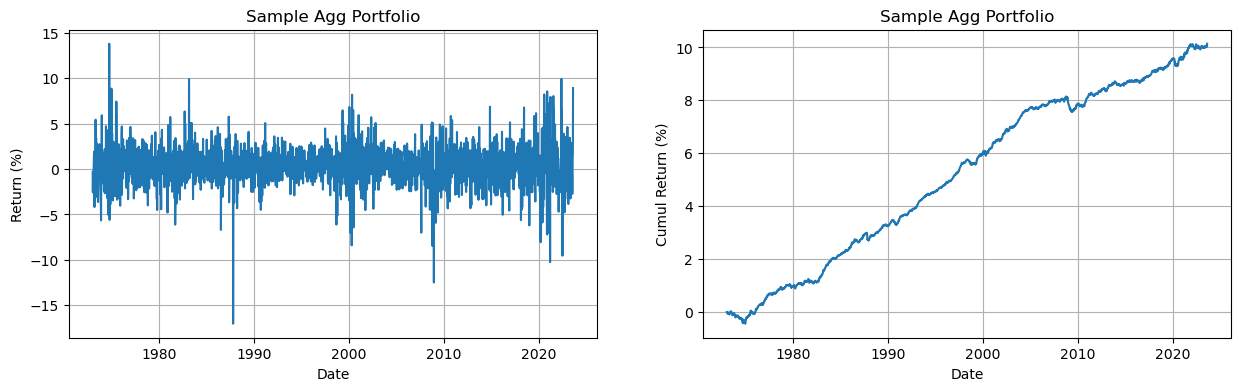

In [81]:
# Plot with 1 raw and 2 columns

fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].plot(sample_agg_portfolio*100)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Return (%)')
axs[0].set_title(sample_agg_portfolio.columns[0])
axs[0].grid()

axs[1].plot(cumul_return_sample*100)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cumul Return (%)')
axs[1].set_title(cumul_return_sample.columns[0])
axs[1].grid()

#### 9. Repeat the previous question by using the factor-based covariance matrix estimate.

In [82]:
factors_agg_portfolio = pd.DataFrame([])

# Iteration for every 12 weeks (Rebalancing)
for end_index in range(3*52, len(weekly_portfolio_data_filtered.index),12) :
        
    # Select the start date (3 years before the end date)
    start_index = end_index - 3*52
    start_date = weekly_portfolio_data_filtered.index[start_index]
    end_date = weekly_portfolio_data_filtered.index[end_index]
    
    # Compute the weight of global minimum variance for every 12 weeks
    w_gmv_sample, w_gmv_factor = weight_gmv(weekly_portfolio_data_filtered, weekly_factors_data_filtered, start_date, end_date) 
    
    # Computed the weighted portfolios
    factors_weighted_portfolios = w_gmv_factor.T * weekly_portfolio_data_filtered.iloc[end_index : end_index+12,:]
    fractional_factors_agg_portfolio = factors_weighted_portfolios.sum(axis=1)
    factors_agg_portfolio = pd.concat([factors_agg_portfolio, fractional_factors_agg_portfolio], axis = 0) 

factors_agg_portfolio.columns = ["Factors Agg Portfolio"]

In [83]:
cumul_return_factor = (1 + factors_agg_portfolio/100).cumprod() - 1

Let's plot the returns and cumulate returns of the aggregate portfolio based on the factors based covariance

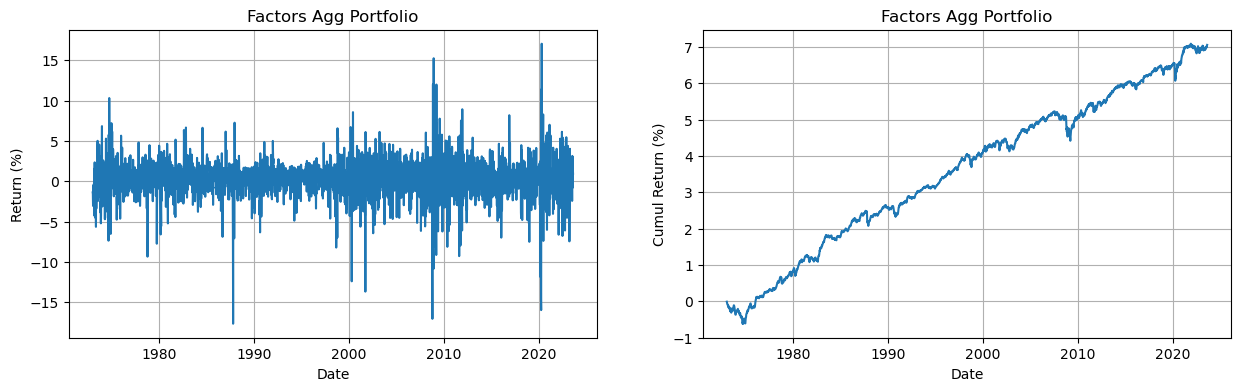

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].plot(factors_agg_portfolio*100)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Return (%)')
axs[0].set_title(factors_agg_portfolio.columns[0])
axs[0].grid()

axs[1].plot(cumul_return_factor*100)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cumul Return (%)')
axs[1].set_title(cumul_return_factor.columns[0])
axs[1].grid()

#### Comparing Sample and Factor Agg Portfolios 

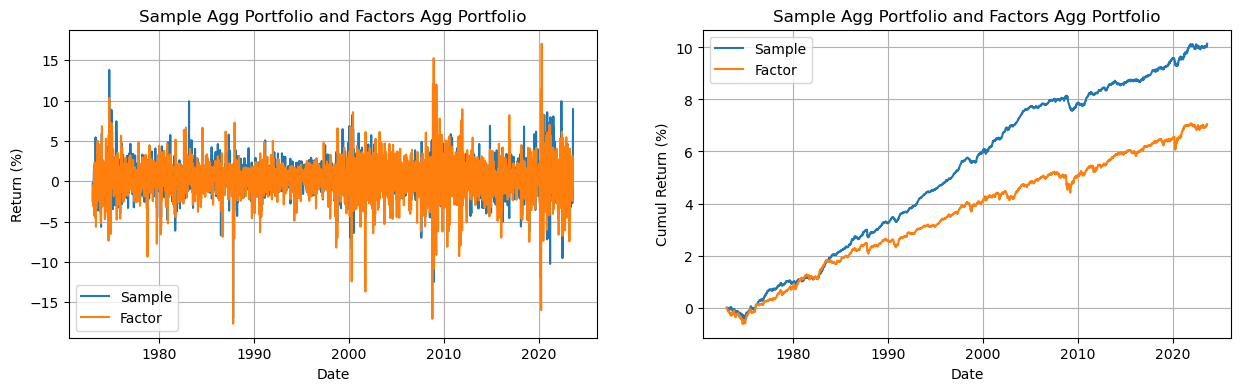

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))
axs[0].plot(sample_agg_portfolio*100, label = "Sample")
axs[0].plot(factors_agg_portfolio*100, label = "Factor")
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Return (%)')
axs[0].set_title(sample_agg_portfolio.columns[0] + " and " + factors_agg_portfolio.columns[0])
axs[0].grid()
axs[0].legend()

axs[1].plot(cumul_return_sample*100, label = "Sample")
axs[1].plot(cumul_return_factor*100, label = "Factor")
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Cumul Return (%)')
axs[1].set_title(cumul_return_sample.columns[0] + " and " + cumul_return_factor.columns[0])
axs[1].grid()
axs[1].legend()

#### 10. Compare the annualized volatilities of the previous two portfolios and conclude on the benefits of using the factor-based matrix over the sample matrix.

In [86]:
#Annual Volatility
vol_sample_agg_portfolio = np.sqrt(52) * sample_agg_portfolio.std()
vol_factors_agg_portfolio = np.sqrt(52) * factors_agg_portfolio.std()
print(f"Volatility of the Sample Aggregate Portfolio : {vol_sample_agg_portfolio.values[0]:.2f}%")
print(f"Volatility of the Factor Aggregate Portfolio : {vol_factors_agg_portfolio.values[0]:.2f}%")


#Annual Sharpe Ratio
sharpe_sample_agg_portfolio = np.sqrt(52) * sample_agg_portfolio.mean() / sample_agg_portfolio.std()
sharpe_factors_agg_portfolio = np.sqrt(52) * factors_agg_portfolio.mean() / factors_agg_portfolio.std()
print(f"Sharpe Ratio of the Sample Aggregate Portfolio : {sharpe_sample_agg_portfolio.values[0]:.2f}")
print(f"Sharpe Ratio of the Factor Aggregate Portfolio : {sharpe_factors_agg_portfolio.values[0]:.2f}")

Volatility of the Sample Aggregate Portfolio : 0.14%
Volatility of the Factor Aggregate Portfolio : 0.18%
Sharpe Ratio of the Sample Aggregate Portfolio : 1.31
Sharpe Ratio of the Factor Aggregate Portfolio : 0.76


Volatility of the Sample and Factor Aggregate Portfolio seems too low ? As a consequence, Sharpe is too high ...

In [87]:
windows = 52

#Rolling Volatility business days
rolling_vol_sample_agg_portfolio = sample_agg_portfolio.rolling(windows).std()
rolling_vol_factors_agg_portfolio = factors_agg_portfolio.rolling(windows).std()

#Rolling Sharpe Ratio business days
rolling_sharpe_sample_agg_portfolio = np.sqrt(windows) * sample_agg_portfolio.rolling(windows).mean() / sample_agg_portfolio.rolling(windows).std()
rolling_sharpe_factors_agg_portfolio = np.sqrt(windows) * factors_agg_portfolio.rolling(windows).mean() / factors_agg_portfolio.rolling(windows).std()


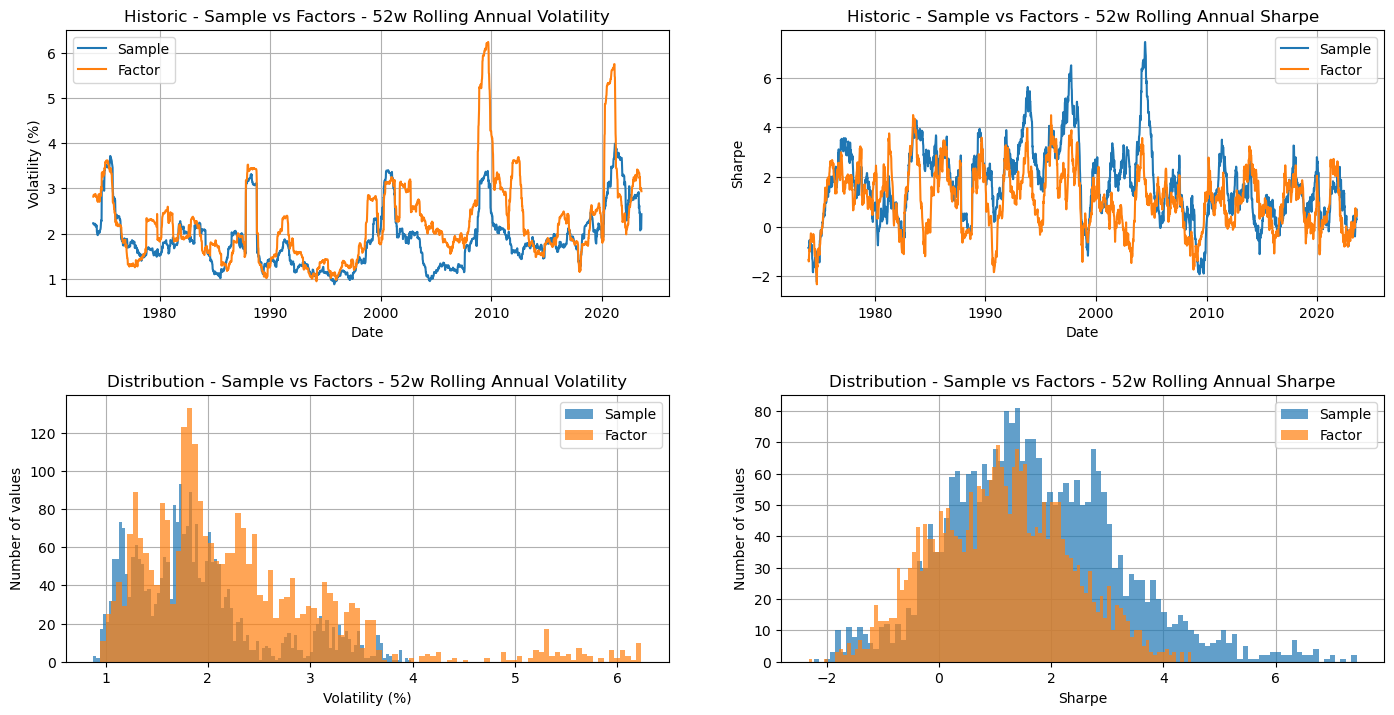

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(15,8))
fig.tight_layout(pad=5.0)

# Historic
axs[0, 0].plot(rolling_vol_sample_agg_portfolio*100, label = "Sample")
axs[0, 0].plot(rolling_vol_factors_agg_portfolio*100, label = "Factor")
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Volatility (%)')
axs[0, 0].set_title("Historic - Sample vs Factors - " + str(windows) + "w Rolling Annual Volatility")
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(rolling_sharpe_sample_agg_portfolio, label = "Sample")
axs[0, 1].plot(rolling_sharpe_factors_agg_portfolio, label = "Factor")
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Sharpe')
axs[0, 1].set_title("Historic - Sample vs Factors - " + str(windows) + "w Rolling Annual Sharpe")
axs[0, 1].grid()
axs[0, 1].legend()

# Distirbution 
axs[1, 0].hist(rolling_vol_sample_agg_portfolio*100, bins = 100, alpha=0.7, label = "Sample")
axs[1, 0].hist(rolling_vol_factors_agg_portfolio*100, bins = 100, alpha=0.7, label = "Factor")
axs[1, 0].set_xlabel('Volatility (%)')
axs[1, 0].set_ylabel('Number of values')
axs[1, 0].set_title("Distribution - Sample vs Factors - " + str(windows) + "w Rolling Annual Volatility")
axs[1, 0].grid()
axs[1, 0].set_axisbelow(True)
axs[1, 0].legend()


axs[1, 1].hist(rolling_sharpe_sample_agg_portfolio, bins = 100, alpha=0.7, label = "Sample")
axs[1, 1].hist(rolling_sharpe_factors_agg_portfolio, bins = 100, alpha=0.7, label = "Factor")
axs[1, 1].set_xlabel('Sharpe')
axs[1, 1].set_ylabel('Number of values')
axs[1, 1].set_title("Distribution - Sample vs Factors - " + str(windows) + "w Rolling Annual Sharpe")
axs[1, 1].grid()
axs[1, 1].set_axisbelow(True)
axs[1, 1].legend()

It seems that there is an error.

In fact, Factor investing provides the benefits of diversification, which minimizes a portfolio's exposure to risk. Factors can improve diversification because style and macroeconomic factors cover various situations in the economic cycle.

# 3. Asian Option Pricing

#### 1. Simulate 10,000 paths for the underlying asset price under the equivalent martingale measure over 6 months with a daily time step, assuming that there are 22 business days in a month, hence 22 × 12 = 264 business days in a year. (You can reuse code from the class examples.)

The function below simulates paths for a Geometric Brownian motion. The returned array, `S`, has two dimensions. Every row corresponds to one date and every row corresponds to a path.

In [38]:
def gbm_simulate(mu: float, sigma: float, initial: float,
                 n_paths: int, time_step: float, n_periods: int,
                 rng: np.random._generator.Generator):
    """
    Simulate paths for a Geometric Brownian motion.
    Note that this function has a side effect because it changes the state of the random number generator.
    """
    
    logS = np.empty((n_periods + 1, n_paths))  # Pre-allocation with an empty array
    
    logS[0, :] = np.log(initial)  # Initial log price
    
    m = mu - .5 * sigma**2  # Expected log return
    
    for i in range(1, n_periods + 1):
        std_innov = rng.standard_normal(n_paths)
        logS[i, :] = logS[i - 1, :] + m * time_step + sigma * np.sqrt(time_step) * std_innov
        
    S = np.exp(logS)    
    
    return S

Let us test the function with the following parameters:

- Expected return is 10% per year: $\mu=0.02$;
- Volatility is 20% per year: $\sigma=0.18$;
- Initial price is \\$100: $S_0=100$;
- 10,000 paths;
- Time step is one day, so it is equivalent to a fraction of year of $h=0.5/132$;
- Simulation horizon is 1 year, which is equivalent to 264 days.

Because the function `gbm_simulate` calls a RNG, we set the seed before we call it, to make our results reproducible. It would not be a good idea to set the seed within the function because we would lose control over the initial state. As a general rule, the instruction to set the seed to a value should be kept outside any function.

In [39]:
S0 = 100
K = 100 
r = 0.02 
T = 0.5 # 6 months horizon
mu = 0.02 
sigma = 0.18 # volatility
n_paths = 10**4 #n_simulations
n_days = 132 # n_periods 264 business days in a year divided by 2 for 6 months horizon
d_steps = 0.5/132 #daily time step

rng = np.random.default_rng(seed=123) # Set a seed for reproducibility
S_paths = gbm_simulate(mu, sigma, S0, n_paths, d_steps, n_days, rng)
S_data = pd.DataFrame(S_paths)

Let's plot the first 100 paths of the Monte Carlo Simulation

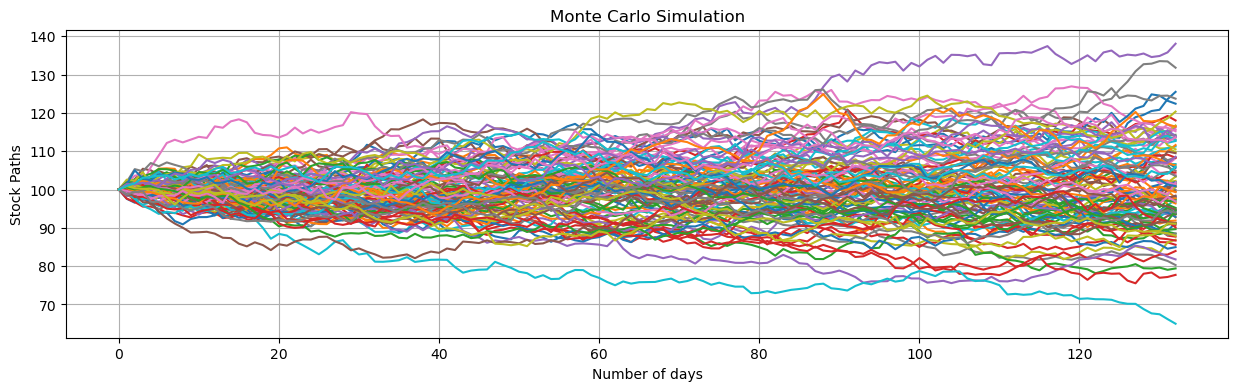

In [40]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(S_data.iloc[:,:100])
ax.set_title('Monte Carlo Simulation')
ax.set_xlabel('Number of days')
ax.set_ylabel('Stock Paths')
ax.grid()

#### 2. Simulate 10,000 values for the option payoff (1) using daily monitoring dates (that is, all the simulation dates). Then, estimate the option price using (2).

In [41]:
def asian_option_monte_carlo(S, K, r, T, sigma, n, m, option_type):
    dt = T / n
    drift = np.exp((r - 0.5 * sigma ** 2) * dt)
    sigma_sqrt_dt = sigma * np.sqrt(dt)

    option_payoffs = []

    for _ in range(m):
        S_t = S
        total_S = 0

        for _ in range(n):
            z = np.random.normal(0, 1)
            S_t *= drift * np.exp(sigma_sqrt_dt * z)
            total_S += S_t

        average_S = total_S / n

        if option_type == 'call':
            option_payoff = max(average_S - K, 0)
        else:
            option_payoff = max(K - average_S, 0)

        option_payoffs.append(option_payoff * np.exp(-r * T))

    option_price = np.mean(option_payoffs)
    option_std_error = np.std(option_payoffs) / np.sqrt(m)

    return option_price, option_std_error

In [42]:
S = 100  # current price of the underlying asset
K = 100  # strike price
r = 0.02  # risk-free interest rate
T = 0.5  # time to expiration
sigma = 0.18  # volatility of the underlying asset
n = 132  # number of discrete monitoring points
m = 10000  # number of simulations
option_type = 'call'  # 'call' or 'put'

option_price, option_std_error = asian_option_monte_carlo(S, K, r, T, sigma, n, m, option_type)
print(f"Option Price : ${option_price:.4f}")
print(f"Standard Error : {option_std_error:.4f}")
print(f"Result of MCL : ${option_price:.4f} ± {option_std_error:.4f}")

Option Price : $3.1490
Standard Error : 0.0468
Result of MCL : $3.1490 ± 0.0468


#### 3. Repeat the previous question using weekly monitoring dates (that is, one simulation date out of five).

In [43]:
S = 100  # current price of the underlying asset
K = 100  # strike price
r = 0.02  # risk-free interest rate
T = 0.5  # time to expiration
sigma = 0.18  # volatility of the underlying asset
n = 26  # number of discrete monitoring points
m = 10000  # number of simulations
option_type = 'call'  # 'call' or 'put'

option_price, option_std_error = asian_option_monte_carlo(S, K, r, T, sigma, n, m, option_type)
print(f"Option Price : ${option_price:.4f}")
print(f"Standard Error : {option_std_error:.4f}")
print(f"Result of MCL : ${option_price:.4f} ± {option_std_error:.4f}")

Option Price : $3.3245
Standard Error : 0.0484
Result of MCL : $3.3245 ± 0.0484


The asian call option with a weekly monitoring is a bit more expensive than the one with daily monitoring. It makes sense as the more datapoints there are, the average spot would be close to 100 (i.e. close to strike)

#### 4. Write a Python function that takes the array of underlying asset values obtained in Question 1 and returns the estimated option price for every maturity and the 95% confidence bounds for the price.

In [44]:
def option_price_with_confidence(paths, K, r, option_type):
    
    n_days, n_simulations = paths.shape
    option_prices = np.zeros(n_days)
    conf_bounds = np.zeros((2, n_days))  # lower and upper bounds

    # We look at random paths with different maturities in days 
    for i in range(n_days):
        average_S = np.mean(paths[:i+1, :], axis=0)

        if option_type == 'call':
            option_payoffs = np.maximum(average_S - K, 0)
        else:
            option_payoffs = np.maximum(K - average_S, 0)

        discount_factor = np.exp(-r * (i+1) / 264)  # adjusting for the fraction of the year
        option_prices[i] = np.mean(option_payoffs) * discount_factor

        std_error = np.std(option_payoffs) / np.sqrt(n_simulations)
        margin_of_error = 1.96 * std_error  # 95% confidence interval
        conf_bounds[0, i] = option_prices[i] - margin_of_error
        conf_bounds[1, i] = option_prices[i] + margin_of_error

    return option_prices, conf_bounds

In [45]:
# Assuming the values from the previous simulation
K = 100  # strike price
r = 0.02  # risk-free interest rate
option_type = 'call'  # 'call' or 'put'

# Calculate option price with confidence bounds
option_prices, conf_bounds = option_price_with_confidence(S_paths, K, r, option_type)

option_prices_data = pd.DataFrame(option_prices, columns = ["Option price"])
conf_bounds_data = pd.DataFrame(conf_bounds.T, columns = ["bounds down","bounds up"])

#### 5. Plot the option price and the bounds as a function of the maturity.

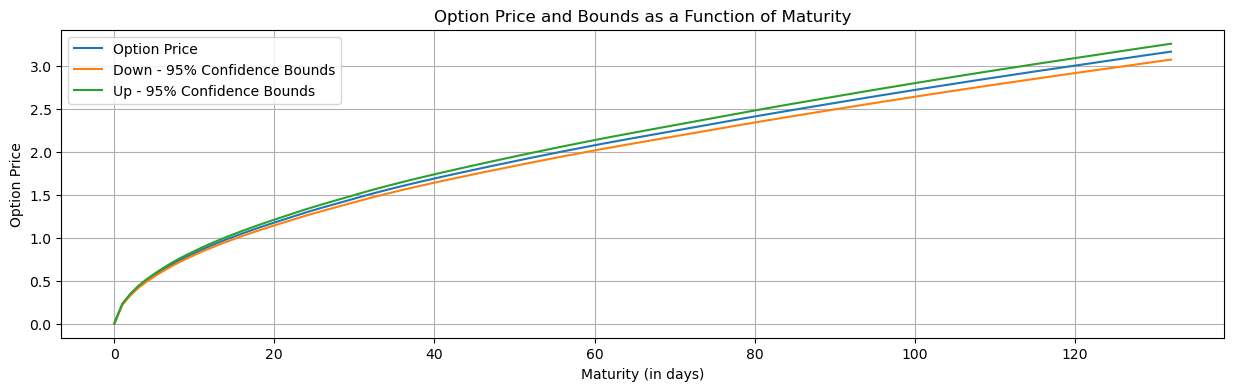

In [89]:
# Plotting the option price and bounds
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(option_prices_data, label="Option Price")
ax.plot(conf_bounds_data["bounds down"], label='Down - 95% Confidence Bounds')
ax.plot(conf_bounds_data["bounds up"], label='Up - 95% Confidence Bounds')
ax.set_title('Option Price and Bounds as a Function of Maturity')
ax.set_xlabel('Maturity (in days)')
ax.set_ylabel('Option Price')
ax.legend()
ax.grid()

The result makes sense as the higher is the maturity, the higher is the probability to be ITM (In-The-Money) which implies a more expensive option price.